In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
import matplotlib.pyplot as plt

In [41]:
# 데이터 불러오기
train_data = pd.read_csv('/home/kyy/2023_고급웹프로그래밍/BiLSTM/data/train.csv')
test_data = pd.read_csv('/home/kyy/2023_고급웹프로그래밍/BiLSTM/data/test.csv')

# 필요한 특성 선택
features = ['traffic', 'wind']
target = 'pm10'

# 날짜를 datetime 형식으로 변환
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

# 데이터 정규화
scaler = MinMaxScaler()
train_data[features + [target]] = scaler.fit_transform(train_data[features + [target]])
test_data[features + [target]] = scaler.transform(test_data[features + [target]])

In [42]:
# 시계열 데이터 생성
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data.iloc[i:i+seq_length]
        sequences.append(seq.values)
    return np.array(sequences)

# 학습 데이터 시계열 데이터 생성
seq_length = 5  # 조절 가능
train_sequences = create_sequences(train_data.drop(columns=['date']), seq_length)

In [43]:
# 학습 데이터로 DataLoader 생성
X_train = torch.tensor(train_sequences[:, :, 1:], dtype=torch.float32)
y_train = torch.tensor(train_sequences[:, -1, -1].reshape(-1, 1), dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_sequences = create_sequences(test_data.drop(columns=['date']), seq_length)
X_test = torch.tensor(test_sequences[:, :, 1:], dtype=torch.float32)
y_test = torch.tensor(test_sequences[:, -1, -1].reshape(-1, 1), dtype=torch.float32)

In [44]:
# PyTorch로 Bi-LSTM 모델 정의
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# 모델, 손실 함수, 최적화기 정의
model = BiLSTM(input_size=X_train.size(-1), hidden_size=50, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [45]:
from sklearn.metrics import mean_squared_error

# 모델 학습
epochs = 30
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

train_losses = []  # 각 에폭의 훈련 손실을 저장할 리스트
test_losses = []   # 각 에폭의 테스트 손실을 저장할 리스트

Training:   7%|▋         | 2/30 [00:00<00:04,  6.23it/s]

Epoch 1/30, Train MSE: 0.2319, Test MSE: 0.1181
Epoch 2/30, Train MSE: 0.0709, Test MSE: 0.0871


Training:  13%|█▎        | 4/30 [00:00<00:04,  6.26it/s]

Epoch 3/30, Train MSE: 0.0570, Test MSE: 0.0753
Epoch 4/30, Train MSE: 0.0498, Test MSE: 0.0678


Training:  20%|██        | 6/30 [00:00<00:03,  6.39it/s]

Epoch 5/30, Train MSE: 0.0419, Test MSE: 0.0614
Epoch 6/30, Train MSE: 0.0338, Test MSE: 0.0562


Training:  27%|██▋       | 8/30 [00:01<00:03,  6.41it/s]

Epoch 7/30, Train MSE: 0.0251, Test MSE: 0.0513
Epoch 8/30, Train MSE: 0.0174, Test MSE: 0.0467


Training:  33%|███▎      | 10/30 [00:01<00:03,  6.54it/s]

Epoch 9/30, Train MSE: 0.0107, Test MSE: 0.0425
Epoch 10/30, Train MSE: 0.0059, Test MSE: 0.0387


Training:  40%|████      | 12/30 [00:01<00:02,  6.58it/s]

Epoch 11/30, Train MSE: 0.0031, Test MSE: 0.0354
Epoch 12/30, Train MSE: 0.0016, Test MSE: 0.0326


Training:  47%|████▋     | 14/30 [00:02<00:02,  6.60it/s]

Epoch 13/30, Train MSE: 0.0009, Test MSE: 0.0302
Epoch 14/30, Train MSE: 0.0005, Test MSE: 0.0281


Training:  53%|█████▎    | 16/30 [00:02<00:02,  6.61it/s]

Epoch 15/30, Train MSE: 0.0003, Test MSE: 0.0262
Epoch 16/30, Train MSE: 0.0002, Test MSE: 0.0246


Training:  60%|██████    | 18/30 [00:02<00:01,  6.62it/s]

Epoch 17/30, Train MSE: 0.0002, Test MSE: 0.0232
Epoch 18/30, Train MSE: 0.0001, Test MSE: 0.0219


Training:  67%|██████▋   | 20/30 [00:03<00:01,  6.62it/s]

Epoch 19/30, Train MSE: 0.0001, Test MSE: 0.0207
Epoch 20/30, Train MSE: 0.0001, Test MSE: 0.0197


Training:  73%|███████▎  | 22/30 [00:03<00:01,  6.63it/s]

Epoch 21/30, Train MSE: 0.0001, Test MSE: 0.0188
Epoch 22/30, Train MSE: 0.0001, Test MSE: 0.0179


Training:  80%|████████  | 24/30 [00:03<00:00,  6.62it/s]

Epoch 23/30, Train MSE: 0.0001, Test MSE: 0.0172
Epoch 24/30, Train MSE: 0.0001, Test MSE: 0.0164


Training:  83%|████████▎ | 25/30 [00:03<00:00,  6.27it/s]

Epoch 25/30, Train MSE: 0.0001, Test MSE: 0.0158
Epoch 26/30, Train MSE: 0.0001, Test MSE: 0.0152
3 에폭 동안 테스트 손실이 개선되지 않았습니다. 조기 종료합니다.


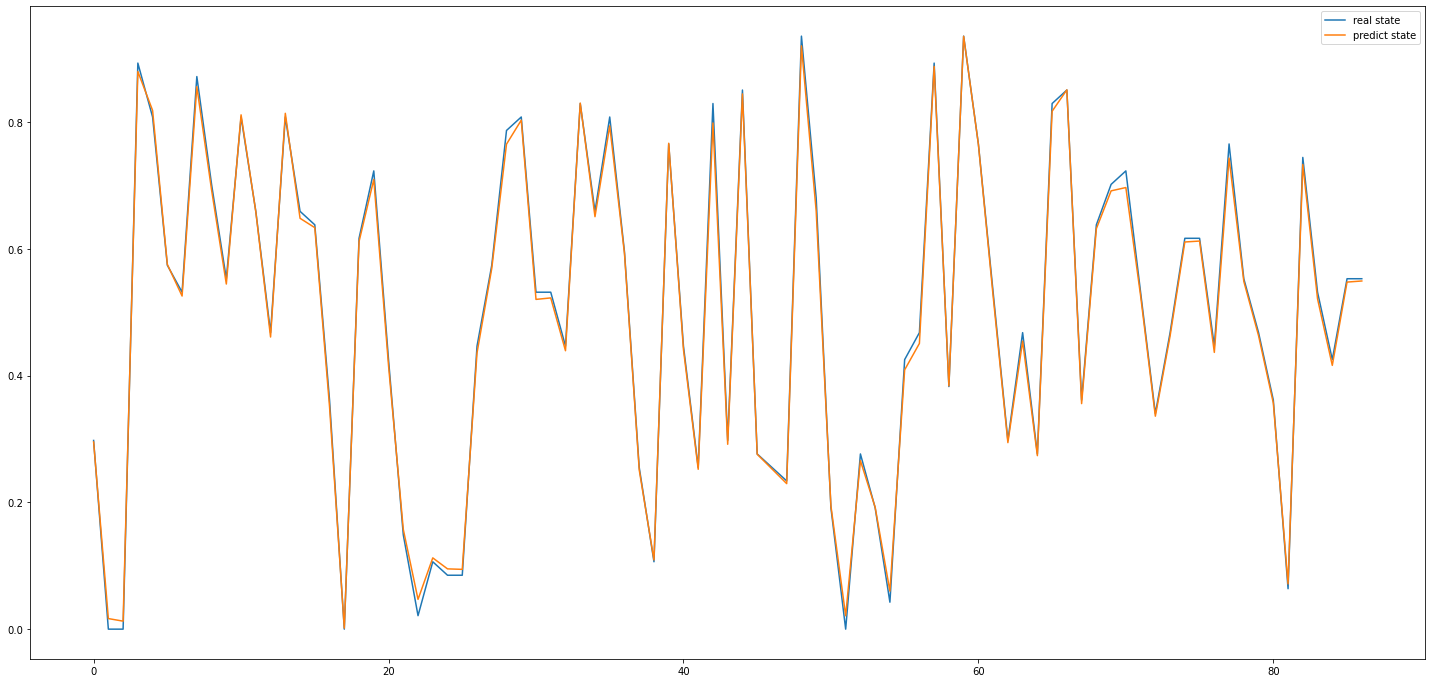

In [46]:
# 모델 학습
epochs = 30

prev_test_loss = float('inf')  # Initialize with a large value
patience = 3  # Define the number of epochs to wait for improvement
no_improvement_count = 0  # Initialize counter for epochs with no improvement

train_losses = []  # 각 에폭의 훈련 손실을 저장할 리스트
test_losses = []   # 각 에폭의 테스트 손실을 저장할 리스트

for epoch in tqdm(range(epochs), desc='Training'):
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X, batch_y
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # 훈련 데이터로 모델을 평가하여 MSE 값을 계산
    model.eval()
    with torch.no_grad():
        y_train_pred = model(X_train).cpu().numpy()
        mse_train = mean_squared_error(y_train.cpu().numpy(), y_train_pred)
        train_losses.append(mse_train)

        # 테스트 데이터로 모델을 평가하여 MSE 값을 계산
        y_test_pred = model(X_test).cpu().numpy()
        mse_test = mean_squared_error(y_test.cpu().numpy(), y_test_pred)
        test_losses.append(mse_test)

    model.train()
    
    # 출력할 때 평균 MSE도 함께 출력
    avg_train_loss = epoch_loss / len(train_loader)
    avg_test_loss = np.mean(test_losses) if test_losses else None
    print(f'Epoch {epoch + 1}/{epochs}, Train MSE: {avg_train_loss:.4f}, Test MSE: {avg_test_loss:.4f}')

    # Check for improvement in test loss
    if mse_test < prev_test_loss:
        prev_test_loss = mse_test
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # Check for early stopping
    if no_improvement_count >= patience:
        print(f'{patience} 에폭 동안 테스트 손실이 개선되지 않았습니다. 조기 종료합니다.')
        break

# 그래프 생성
plt.rcParams["figure.figsize"] = (25, 12)
plt.plot(np.arange(len(y_test)), y_test, label='real state')
plt.plot(np.arange(len(y_test_pred)), y_test_pred, label='predict state')
plt.legend()
plt.show()